# COMP 4830 and 5500 Project 

## Instructions:
On this project, you can work alone or with one of your friends. Everyone needs to submit their project on ELEARN no matter it is done as a team or alone. In the report, write the names of all the students worked in this project. Put all files, source codes and your results in <span style="color:red">jupyter notebook file</span> and name it as LASTNAME_Project.ipynb  and submit it through eLearn. Any different form of submission will lose 10 points. Any kind of plagiarism is prohibited. Any late submission will lose 20 points.


Please enter your name: Maksims Kazijevs<br>
Your team members name: N/A<br>

## Project Description
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
culmen_length_mm: culmen length (mm)<br>
culmen_depth_mm: culmen depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>


<table><tr>
<td> <img src="culmen.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="bodyparts.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

## Part 1 Preparing the Data (10 Points)

Choose only the Adelie and Gentoo species data <br>
Drop 'rowid', 'island', 'sex', 'year' <br>
Reset the index <br>
Create another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 
Draw a sublpot which shows all the 2D distributions of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>
Your Code:

In [2]:
# Load data
df_orig = pd.read_csv(r"penguins.csv")
print("Shape of original DataFrame:", df_orig.shape)
df_orig.head()

Shape of original DataFrame: (344, 9)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Drop rows with NaN values in them
df_orig = df_orig.dropna()
print("Shape of original DataFrame after droping NaN values:", df_orig.shape)
df_orig.head()

Shape of original DataFrame after droping NaN values: (333, 9)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
# Dropping columns and keeping required species
df = df_orig.drop(columns=['rowid','island','sex','year'])
df = df[(df["species"] == "Adelie") | (df["species"] == "Gentoo")]
print("Shape of DataFrame after droping columns and keeping species:", df.shape)
df.head()

Shape of DataFrame after droping columns and keeping species: (265, 5)


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [5]:
# Reset index
df = df.reset_index(drop=True)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


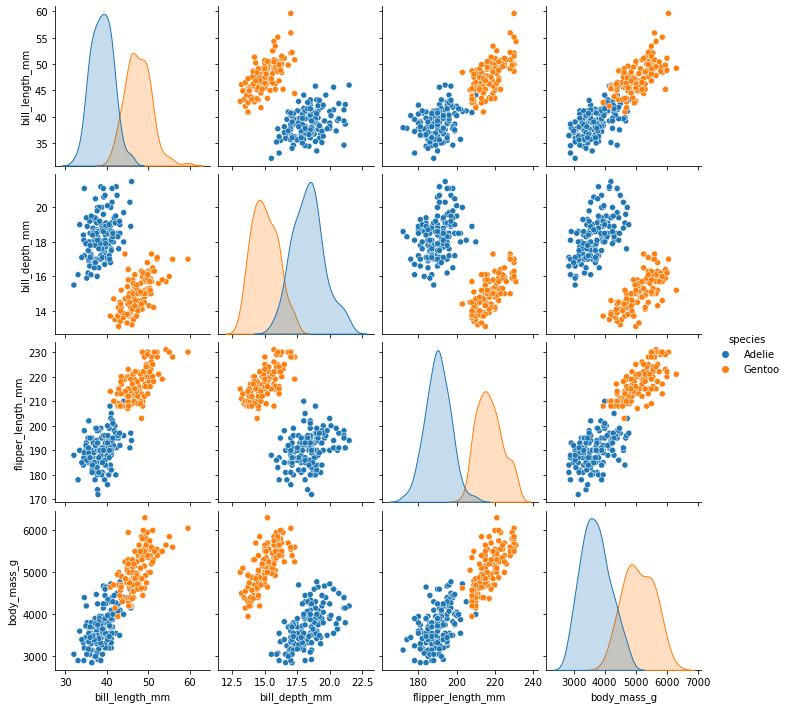

In [6]:
# Making pair grid plot using Seaborn library
sns.pairplot(df, hue='species')

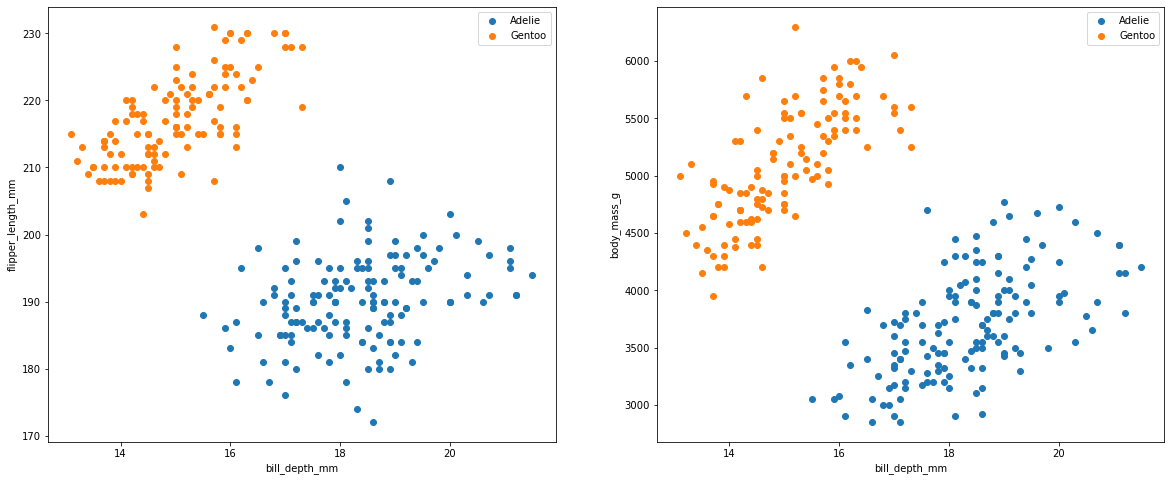

In [7]:
# Making additional 2 plots to better see what features are better to classify with

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].scatter(df[df["species"] == "Adelie"]['bill_depth_mm'],df[df["species"] == "Adelie"]['flipper_length_mm'],label='Adelie')
ax[0].scatter(df[df["species"] == "Gentoo"]['bill_depth_mm'],df[df["species"] == "Gentoo"]['flipper_length_mm'],label='Gentoo')
ax[0].set_xlabel("bill_depth_mm")
ax[0].set_ylabel("flipper_length_mm")
ax[0].legend()

ax[1].scatter(df[df["species"] == "Adelie"]['bill_depth_mm'],df[df["species"] == "Adelie"]['body_mass_g'],label='Adelie')
ax[1].scatter(df[df["species"] == "Gentoo"]['bill_depth_mm'],df[df["species"] == "Gentoo"]['body_mass_g'],label='Gentoo')
ax[1].set_xlabel("bill_depth_mm")
ax[1].set_ylabel("body_mass_g")
ax[1].legend()

plt.show()

#### Discuss which two features are good to classify these two groups? 


Your Answer: By looking at the pair plot first we can see that there are two pairs of features that are good in terms of classification, they are bill_depth_mm vs flipper_length_mm and bill_depth_mm vs body_mass_g. I have decided to make a closer look inside of the plots by only displaying them and it looks like bill_depth_mm vs flipper_length_mm will make better classification job

## Part 2 PCA
Apply PCA to the data <br>
Find and figure out how many principaldimensions are good to choose <br>
Draw a 2-D and 3-D graphs using the best principal dimensions <br>
Your code:

In [8]:
# Preparing df for PCA
# It would be easier to set species as index for later visualization
pca_df = df.set_index('species',drop=True)
pca_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,39.1,18.7,181.0,3750.0
Adelie,39.5,17.4,186.0,3800.0
Adelie,40.3,18.0,195.0,3250.0
Adelie,36.7,19.3,193.0,3450.0
Adelie,39.3,20.6,190.0,3650.0


Most Important Principal Components:
PC1: 79.4% - components: [ 0.5255141  -0.4035995   0.53893257  0.52009043]
PC2: 15.0% - components: [0.24753964 0.89491823 0.07865342 0.36284862]
PC3: 3.2% - components: [-0.8103413   0.02947125  0.44117293  0.38450601]
PC4: 2.4% - components: [-0.07685077 -0.18804318 -0.71325435  0.67082185]


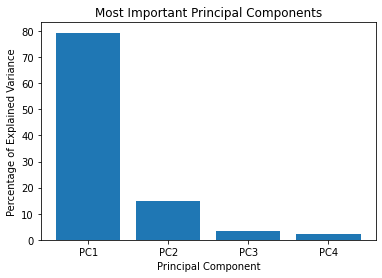

PCA components
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
PC1        0.525514      -0.403600           0.538933     0.520090
PC2        0.247540       0.894918           0.078653     0.362849
PC3       -0.810341       0.029471           0.441173     0.384506
PC4       -0.076851      -0.188043          -0.713254     0.670822


In [9]:
# Scaling data
scaled_data = preprocessing.scale(pca_df)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plots
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

print("Most Important Principal Components:")
for i in range(len(per_var)):
    print("PC"+str(i+1)+":", str(per_var[i])+"%","- components:", pca.components_[i])

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Most Important Principal Components')
plt.show()

print("PCA components")
print(pd.DataFrame(pca.components_, index = labels, columns=pca_df.columns))

In [10]:
print("Variance explained using 2 PCA components:","{:.2f}".format(per_var[:2].sum()))
print("Variance explained using 3 PCA components:","{:.2f}".format(per_var[:3].sum()))

Variance explained using 2 PCA components: 94.40
Variance explained using 3 PCA components: 97.60


In [11]:
# Make dataframe using PCA data
pca_df = pd.DataFrame(pca_data, index=pca_df.index, columns=labels)
pca_df

,PC1,PC2,PC3,PC4
species,,,,
Adelie,-1.866641,0.292795,-0.296307,0.429473
Adelie,-1.353915,-0.220265,-0.207593,0.347548
Adelie,-1.411582,-0.105421,-0.310769,-0.588922
Adelie,-1.984411,0.379419,0.301691,-0.402402
Adelie,-1.967213,1.153875,-0.080535,-0.259844
...,...,...,...,...
Gentoo,1.872658,-0.870793,-0.120607,0.148848
Gentoo,1.700966,-0.649363,-0.054493,-0.009097
Gentoo,2.592881,0.572770,0.024487,0.193763


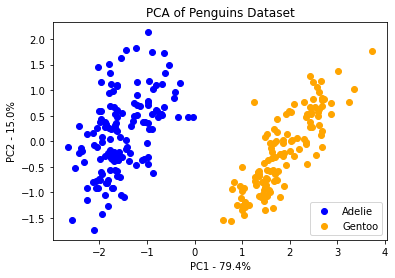

In [12]:
# 2D PCA plot
plt.scatter(pca_df.PC1[pca_df.index=='Adelie'], pca_df.PC2[pca_df.index=='Adelie'],label='Adelie',c="blue")
plt.scatter(pca_df.PC1[pca_df.index=='Gentoo'], pca_df.PC2[pca_df.index=='Gentoo'],label='Gentoo',c="orange")
plt.title('PCA of Penguins Dataset')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


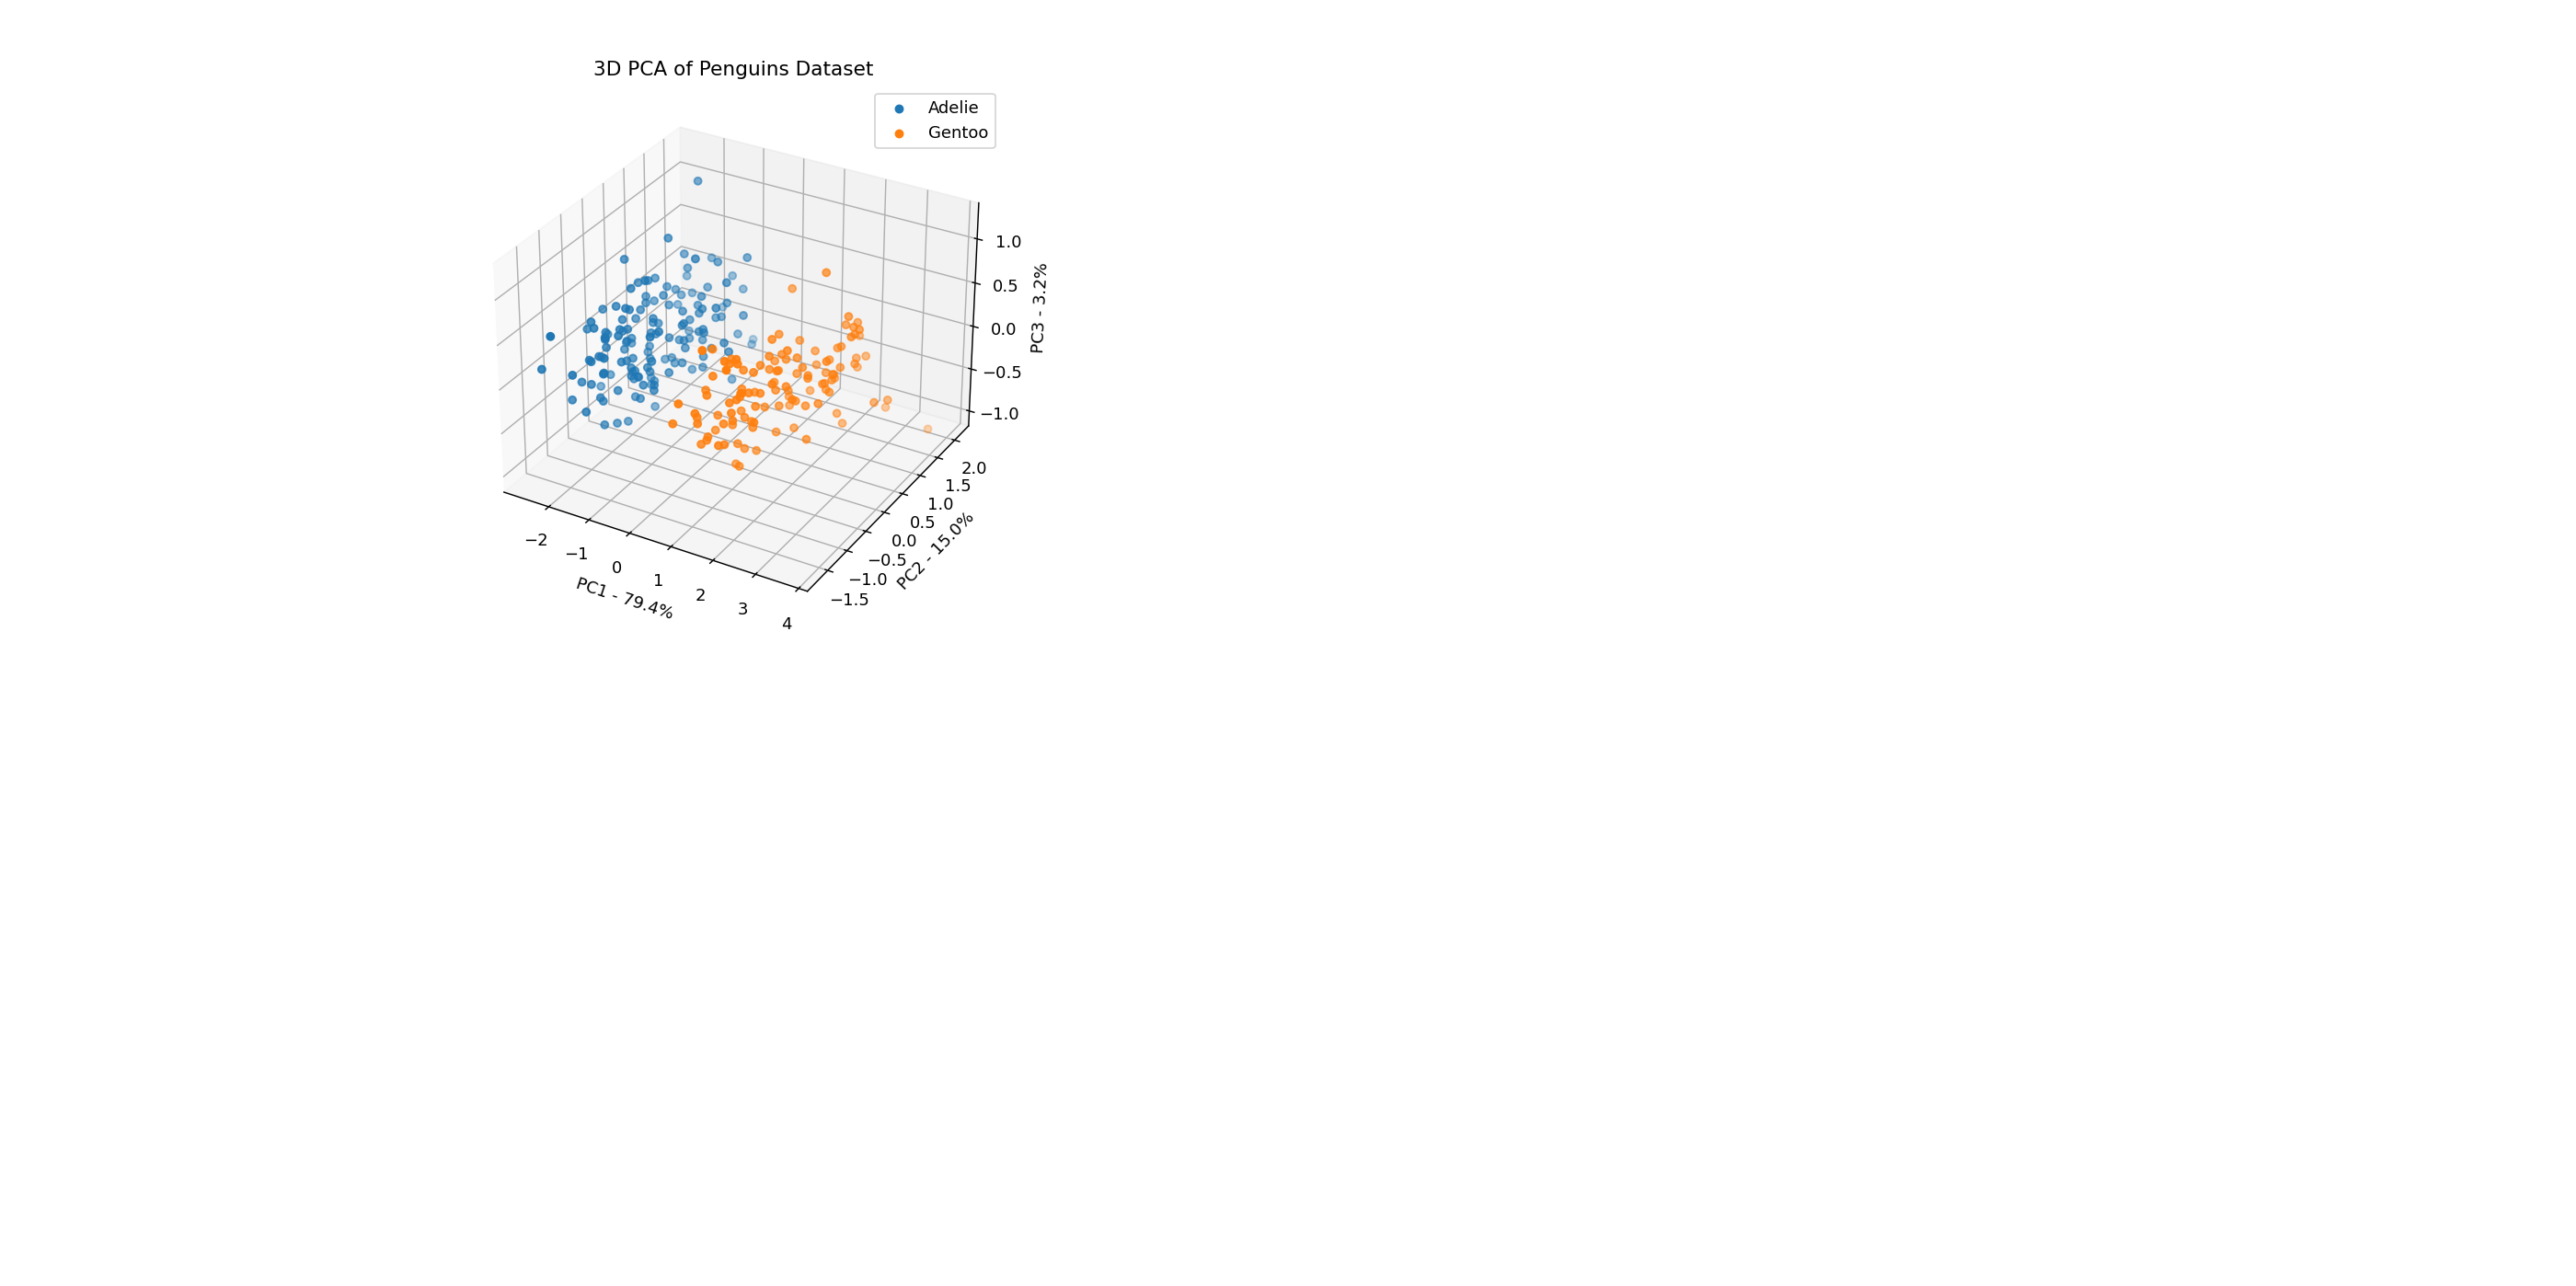

In [13]:
%matplotlib notebook
%matplotlib notebook 
import matplotlib.pyplot as plt
# 3D PCA plot
# RUN THIS CELL TO DISPLAY 3D PLOT
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
plt.title('3D PCA of Penguins Dataset')
ax.scatter(pca_df.PC1[pca_df.index=='Adelie'], pca_df.PC2[pca_df.index=='Adelie'], pca_df.PC3[pca_df.index=='Adelie'],label='Adelie')
ax.scatter(pca_df.PC1[pca_df.index=='Gentoo'], pca_df.PC2[pca_df.index=='Gentoo'], pca_df.PC3[pca_df.index=='Gentoo'],label='Gentoo')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))
plt.legend()


plt.show()

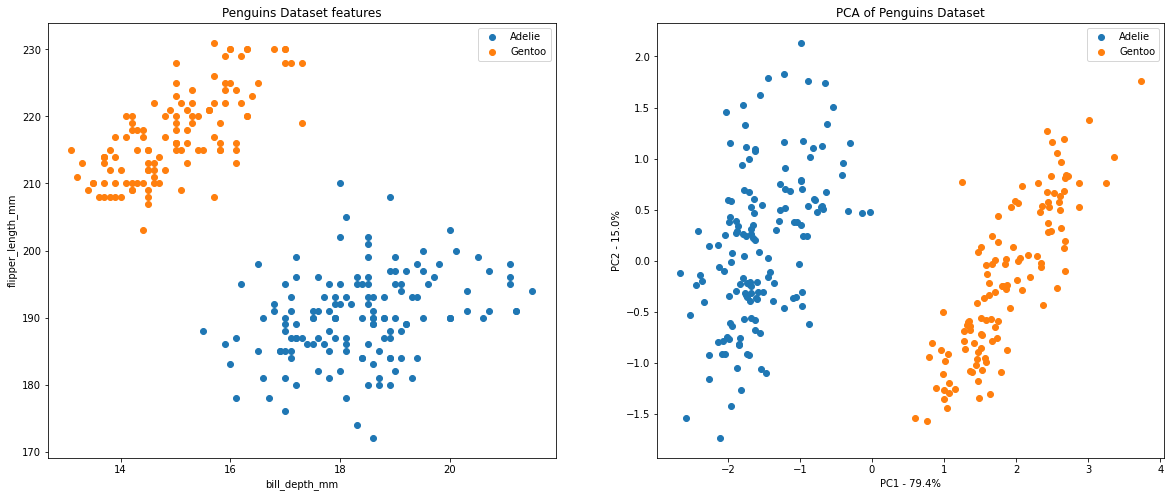

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
# Comparing 2D plots, data features and PCA data features

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].set_title('Penguins Dataset features')
ax[0].scatter(df[df["species"] == "Adelie"]['bill_depth_mm'],df[df["species"] == "Adelie"]['flipper_length_mm'],label='Adelie')
ax[0].scatter(df[df["species"] == "Gentoo"]['bill_depth_mm'],df[df["species"] == "Gentoo"]['flipper_length_mm'],label='Gentoo')
ax[0].set_xlabel("bill_depth_mm")
ax[0].set_ylabel("flipper_length_mm")
ax[0].legend()

ax[1].set_title('PCA of Penguins Dataset')
ax[1].scatter(pca_df.PC1[pca_df.index=='Adelie'], pca_df.PC2[pca_df.index=='Adelie'],label='Adelie')
ax[1].scatter(pca_df.PC1[pca_df.index=='Gentoo'], pca_df.PC2[pca_df.index=='Gentoo'],label='Gentoo')
ax[1].set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax[1].set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax[1].legend()

plt.show()

#### Discuss your results? Is it better than the subplots in terms of seperation? 


Your Answer: We will keep 3 most important PCA components to make sure that we explain at least 95% of the variance. Two PCA components will get us 94.40 explained variance, while 3 PCA components will give us 97.60. Since we still can visualize 2D and 3D data we will have 2 plots using two and three principal components. <br> Looking at the 2D and 3D plots of PCA we can feel that it helps to better separate two classes from each other ,than simple visualization of the features. But in the case with the given data, bill_depth_mm vs flipper_length_mm features already does a good job in terms of separation. 3D PCA plot doesn't differ that much from 2D PCA plot, however, it brings some interactiveness.
<br>
NOTE: Please run the cell with 3D plot separately to make it visible and functional. Because of matplotlib backend it's not possible to change between functionality

## Part 3 Kmeans
Apply Kmeans to the PCA Data <br>
Your code:

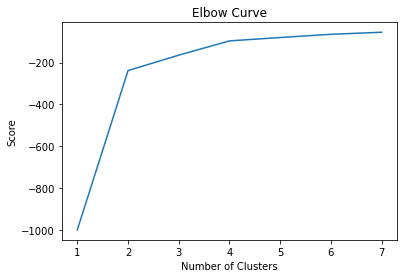

In [15]:
# First we figure out what would be optimal number of cluster
# We know that we have 2 different classes and 2 clusters would be efficient
# But Elbow plot will help us see if we have some problems with distinguishing clusters

training_X = np.vstack((pca_df["PC1"].tolist(), pca_df["PC2"].tolist())).T
                       
scores=[]
k = 8
for i in range(1,k):
    kmeans = KMeans(n_clusters=int(i), random_state=0, max_iter=300)
    kmeans.fit(training_X)
    scores.append(kmeans.score(training_X))


plt.plot( range(1,k),scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

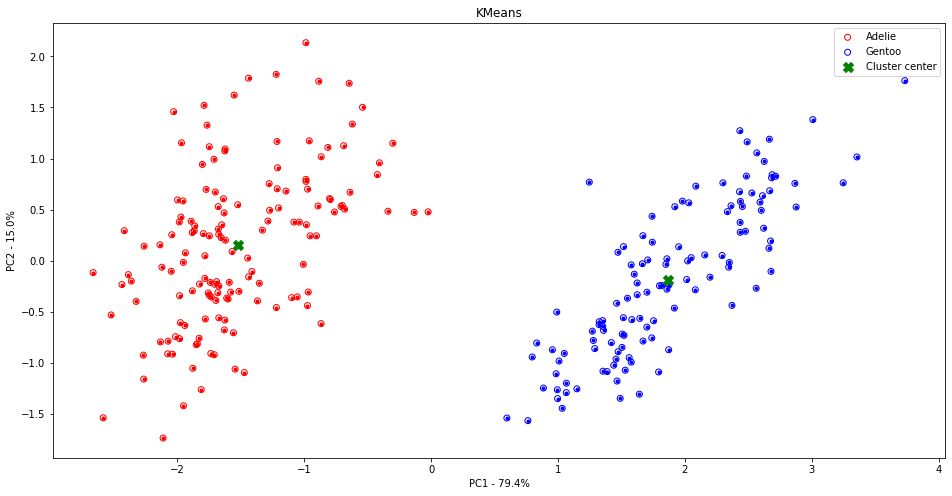

In [16]:
# Elbow plot confirmed that 2 clusters would be optimal
# Now it's time for KMeans

# kmeans training with 2 classes
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(training_X)

# plotting
plt.figure(figsize=(16,8))
for i in range(len(pca_df["PC2"].tolist())):
    if kmeans.labels_[i]==0:
        plt.scatter(pca_df["PC1"].tolist()[i], pca_df["PC2"].tolist()[i], marker='.', color='blue')
    else:
        plt.scatter(pca_df["PC1"].tolist()[i], pca_df["PC2"].tolist()[i], marker='.', color='red')

# Plotting actual PCA data on top to see if we got any mismatches
plt.scatter(pca_df.PC1[pca_df.index=='Adelie'], pca_df.PC2[pca_df.index=='Adelie'],label='Adelie', facecolors='none', edgecolors='red')
plt.scatter(pca_df.PC1[pca_df.index=='Gentoo'], pca_df.PC2[pca_df.index=='Gentoo'],label='Gentoo', facecolors='none', edgecolors='blue')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='X', c='green',label='Cluster center')

plt.legend()
plt.title("KMeans")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

#### Discuss your results? Are you able seperate all the species correctly with Kmeans? 

Your Answer: From the plot above we can see that all samples were classified correctly with KMeans algorithm. For validation I have plotted actual samples (circles) on top of KMeans predicted ones (dots). Further analysis wasn't required in this case, because we can see visually that result is satisfactory

## Part 4 Neural Network
Use Neural Network based classifier to find the members of each class using the best principal features. <br>
Your Code:

/Users/max/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


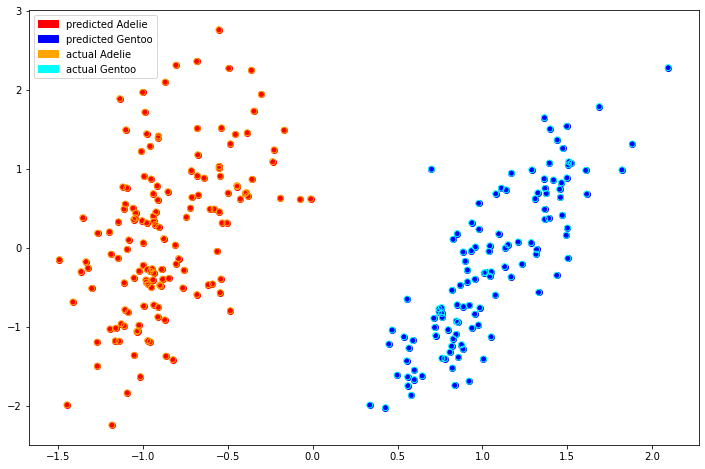

Accuracy of MLPClassifier(in percentage) : 100.0
Final Loss Value : 0.19913048268044706
Final Iterations : 200


In [17]:
import matplotlib.patches as mpatches

scaler = StandardScaler()
# Take 3 PCA components and scale it
trainX = np.vstack((pca_df['PC1'],pca_df['PC2'],pca_df['PC3'])).T
scaler.fit(trainX)
trainX = scaler.transform(trainX) 
trainY = pca_df.index.tolist()

nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 50), max_iter =200, random_state=1)
nn.fit(trainX, trainY )

# Plot prediction based on 3 features on 2D plot
plt.figure(figsize=(12,8))
for i in range(len(training_X)):
    ans = nn.predict([[trainX[i,0],trainX[i,1],trainX[i,2]]])
    if ans=='Adelie':
        plt.scatter(trainX[i,0], trainX[i,1], color='red')
    else:
        plt.scatter(trainX[i,0], trainX[i,1], color='blue')
        
red_patch = mpatches.Patch(color='red', label='predicted Adelie')    
blue_patch = mpatches.Patch(color='blue', label='predicted Gentoo')

temp_df = pd.DataFrame(trainX, index=pca_df.index)

plt.scatter(temp_df[0][temp_df.index=='Adelie'], temp_df[1][temp_df.index=='Adelie'],label='actual Adelie', facecolors='none', edgecolors='orange')
plt.scatter(temp_df[0][temp_df.index=='Gentoo'], temp_df[1][temp_df.index=='Gentoo'],label='actual Gentoo', facecolors='none', edgecolors='cyan')

orange_patch = mpatches.Patch(color='orange', label='actual Adelie')    
cyan_patch = mpatches.Patch(color='cyan', label='actual Gentoo')  


plt.legend(handles=[red_patch,blue_patch,orange_patch,cyan_patch])
plt.show()
        
#Comparing the predictions against the actual observations
yp = nn.predict(trainX)

#check how many of them are predicted well
count  = 0;
for i in range(len(trainX)):
    if yp[i] == trainY[i]:
        count +=1

accuracy = count/len(trainY)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

As we see, neural network does perfect job in terms of classifying the correct label based on 3 PCA features. Additional analysis isn't required here since we got 100% accuracy

## Part 5 Graduate Student (BONUS for Undergraduate Students)

Choose all the species and the sex column. And apply the same requirements listed in part 2,3,4<br>
Your Code and Discussions:

In [18]:
# Original data
df_orig.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [19]:
# Dropping columns and keeping required species
df_2 = df_orig.drop(columns=['rowid','island','year'])
print("Shape of DataFrame after droping columns and keeping species:", df.shape)
df_2.head()

Shape of DataFrame after droping columns and keeping species: (265, 5)


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male


In [20]:
# We will store the species column just for a reference and drop it from dataframe
species = df_2['species']
df_2.drop(columns=['species'],inplace=True)
df_2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,male
1,39.5,17.4,186.0,3800.0,female
2,40.3,18.0,195.0,3250.0,female
4,36.7,19.3,193.0,3450.0,female
5,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,male
340,43.5,18.1,202.0,3400.0,female
341,49.6,18.2,193.0,3775.0,male
342,50.8,19.0,210.0,4100.0,male


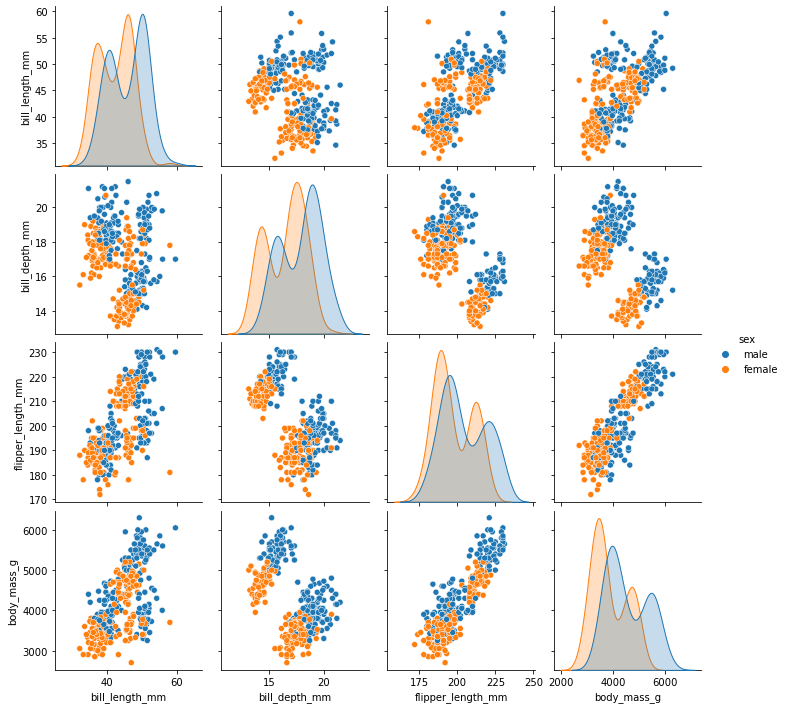

In [21]:
# Making pair grid plot using Seaborn library
sns.pairplot(df_2, hue='sex')

This time, when we used all species and try to classify sex, we can see that it is really hard to distinguish two classes based on the given features. A lot of samples overlap using the raw data, which means that we will need to use other algorithms to perform better classification. From the plots we still can see that bill_depth_mm vs flipper_length_mm and bill_depth_mm vs body_mass_g does a better job than any other features. Let's take a closer look inside those two plot

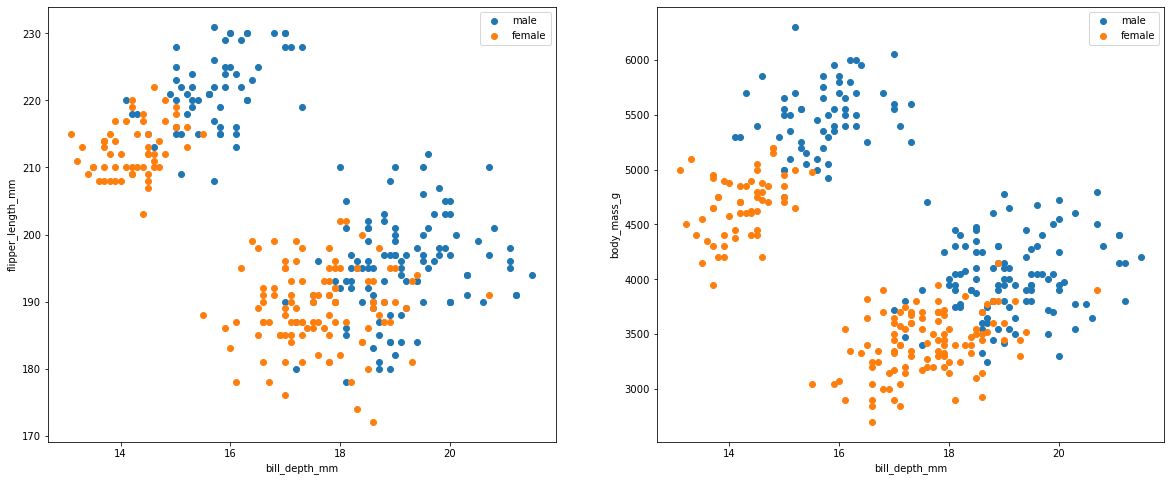

In [22]:
# Making additional 2 plots to better see what features are better to classify with

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].scatter(df_2[df_2["sex"] == "male"]['bill_depth_mm'],df_2[df_2["sex"] == "male"]['flipper_length_mm'],label='male')
ax[0].scatter(df_2[df_2["sex"] == "female"]['bill_depth_mm'],df_2[df_2["sex"] == "female"]['flipper_length_mm'],label='female')
ax[0].set_xlabel("bill_depth_mm")
ax[0].set_ylabel("flipper_length_mm")
ax[0].legend()

ax[1].scatter(df_2[df_2["sex"] == "male"]['bill_depth_mm'],df_2[df_2["sex"] == "male"]['body_mass_g'],label='male')
ax[1].scatter(df_2[df_2["sex"] == "female"]['bill_depth_mm'],df_2[df_2["sex"] == "female"]['body_mass_g'],label='female')
ax[1].set_xlabel("bill_depth_mm")
ax[1].set_ylabel("body_mass_g")
ax[1].legend()

plt.show()

In the closer look we see that a lot of samples overlap and doesn't give us a clear picture for classification. As the next step we will perform PCA to find better features

In [23]:
# Preparing df for PCA
# It would be easier to set species as index for later visualization
pca_df_2 = df_2.set_index('sex',drop=True)
pca_df_2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
male,39.1,18.7,181.0,3750.0
female,39.5,17.4,186.0,3800.0
female,40.3,18.0,195.0,3250.0
female,36.7,19.3,193.0,3450.0
male,39.3,20.6,190.0,3650.0


Most Important Principal Components:
PC1: 68.6% - components: [ 0.45375317 -0.39904723  0.576825    0.54967471]
PC2: 19.5% - components: [0.6001949  0.79616951 0.00578817 0.07646366]
PC3: 9.2% - components: [ 0.64249509 -0.42580043 -0.23609516 -0.59173738]
PC4: 2.7% - components: [ 0.14516955 -0.1599044  -0.78198369  0.58468615]


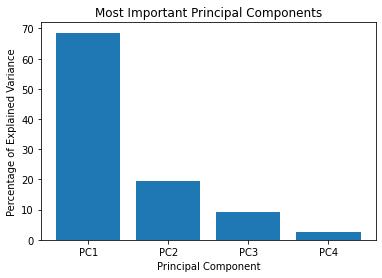

PCA components
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
PC1        0.453753      -0.399047           0.576825     0.549675
PC2        0.600195       0.796170           0.005788     0.076464
PC3        0.642495      -0.425800          -0.236095    -0.591737
PC4        0.145170      -0.159904          -0.781984     0.584686


In [24]:
# Scaling data
scaled_data = preprocessing.scale(pca_df_2)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plots
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

print("Most Important Principal Components:")
for i in range(len(per_var)):
    print("PC"+str(i+1)+":", str(per_var[i])+"%","- components:", pca.components_[i])

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Most Important Principal Components')
plt.show()

print("PCA components")
print(pd.DataFrame(pca.components_, index = labels, columns=pca_df_2.columns))

In [25]:
print("Variance explained using 2 PCA components:","{:.2f}".format(per_var[:2].sum()))
print("Variance explained using 3 PCA components:","{:.2f}".format(per_var[:3].sum()))

Variance explained using 2 PCA components: 88.10
Variance explained using 3 PCA components: 97.30


With the help of PCA we can see that 2 components wouldn't be enough to apply it for our data since combined explained variance is less than 95% for 2 components. With the help of 3 components we will achieve score of 97.3% which is exactly what we need

In [26]:
# Make dataframe using PCA data
pca_df2 = pd.DataFrame(pca_data, index=pca_df_2.index, columns=labels)
pca_df2

,PC1,PC2,PC3,PC4
sex,,,,
male,-1.853593,0.032069,-0.234902,0.528397
female,-1.316254,-0.443527,-0.027470,0.401727
female,-1.376605,-0.161230,0.189689,-0.528662
female,-1.885288,-0.012351,-0.628873,-0.472893
male,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
male,0.553475,2.347612,0.869245,-0.388080
female,-0.739914,0.248155,0.316067,-0.733778
male,-0.367890,0.991080,0.887996,0.195863


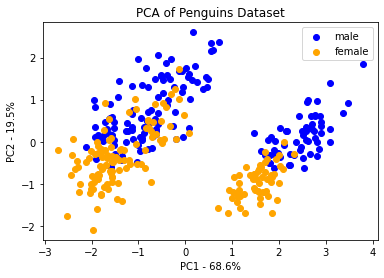

In [27]:
# 2D PCA plot
plt.scatter(pca_df2.PC1[pca_df2.index=='male'], pca_df2.PC2[pca_df2.index=='male'],label='male',c="blue")
plt.scatter(pca_df2.PC1[pca_df2.index=='female'], pca_df2.PC2[pca_df2.index=='female'],label='female',c="orange")
plt.title('PCA of Penguins Dataset')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


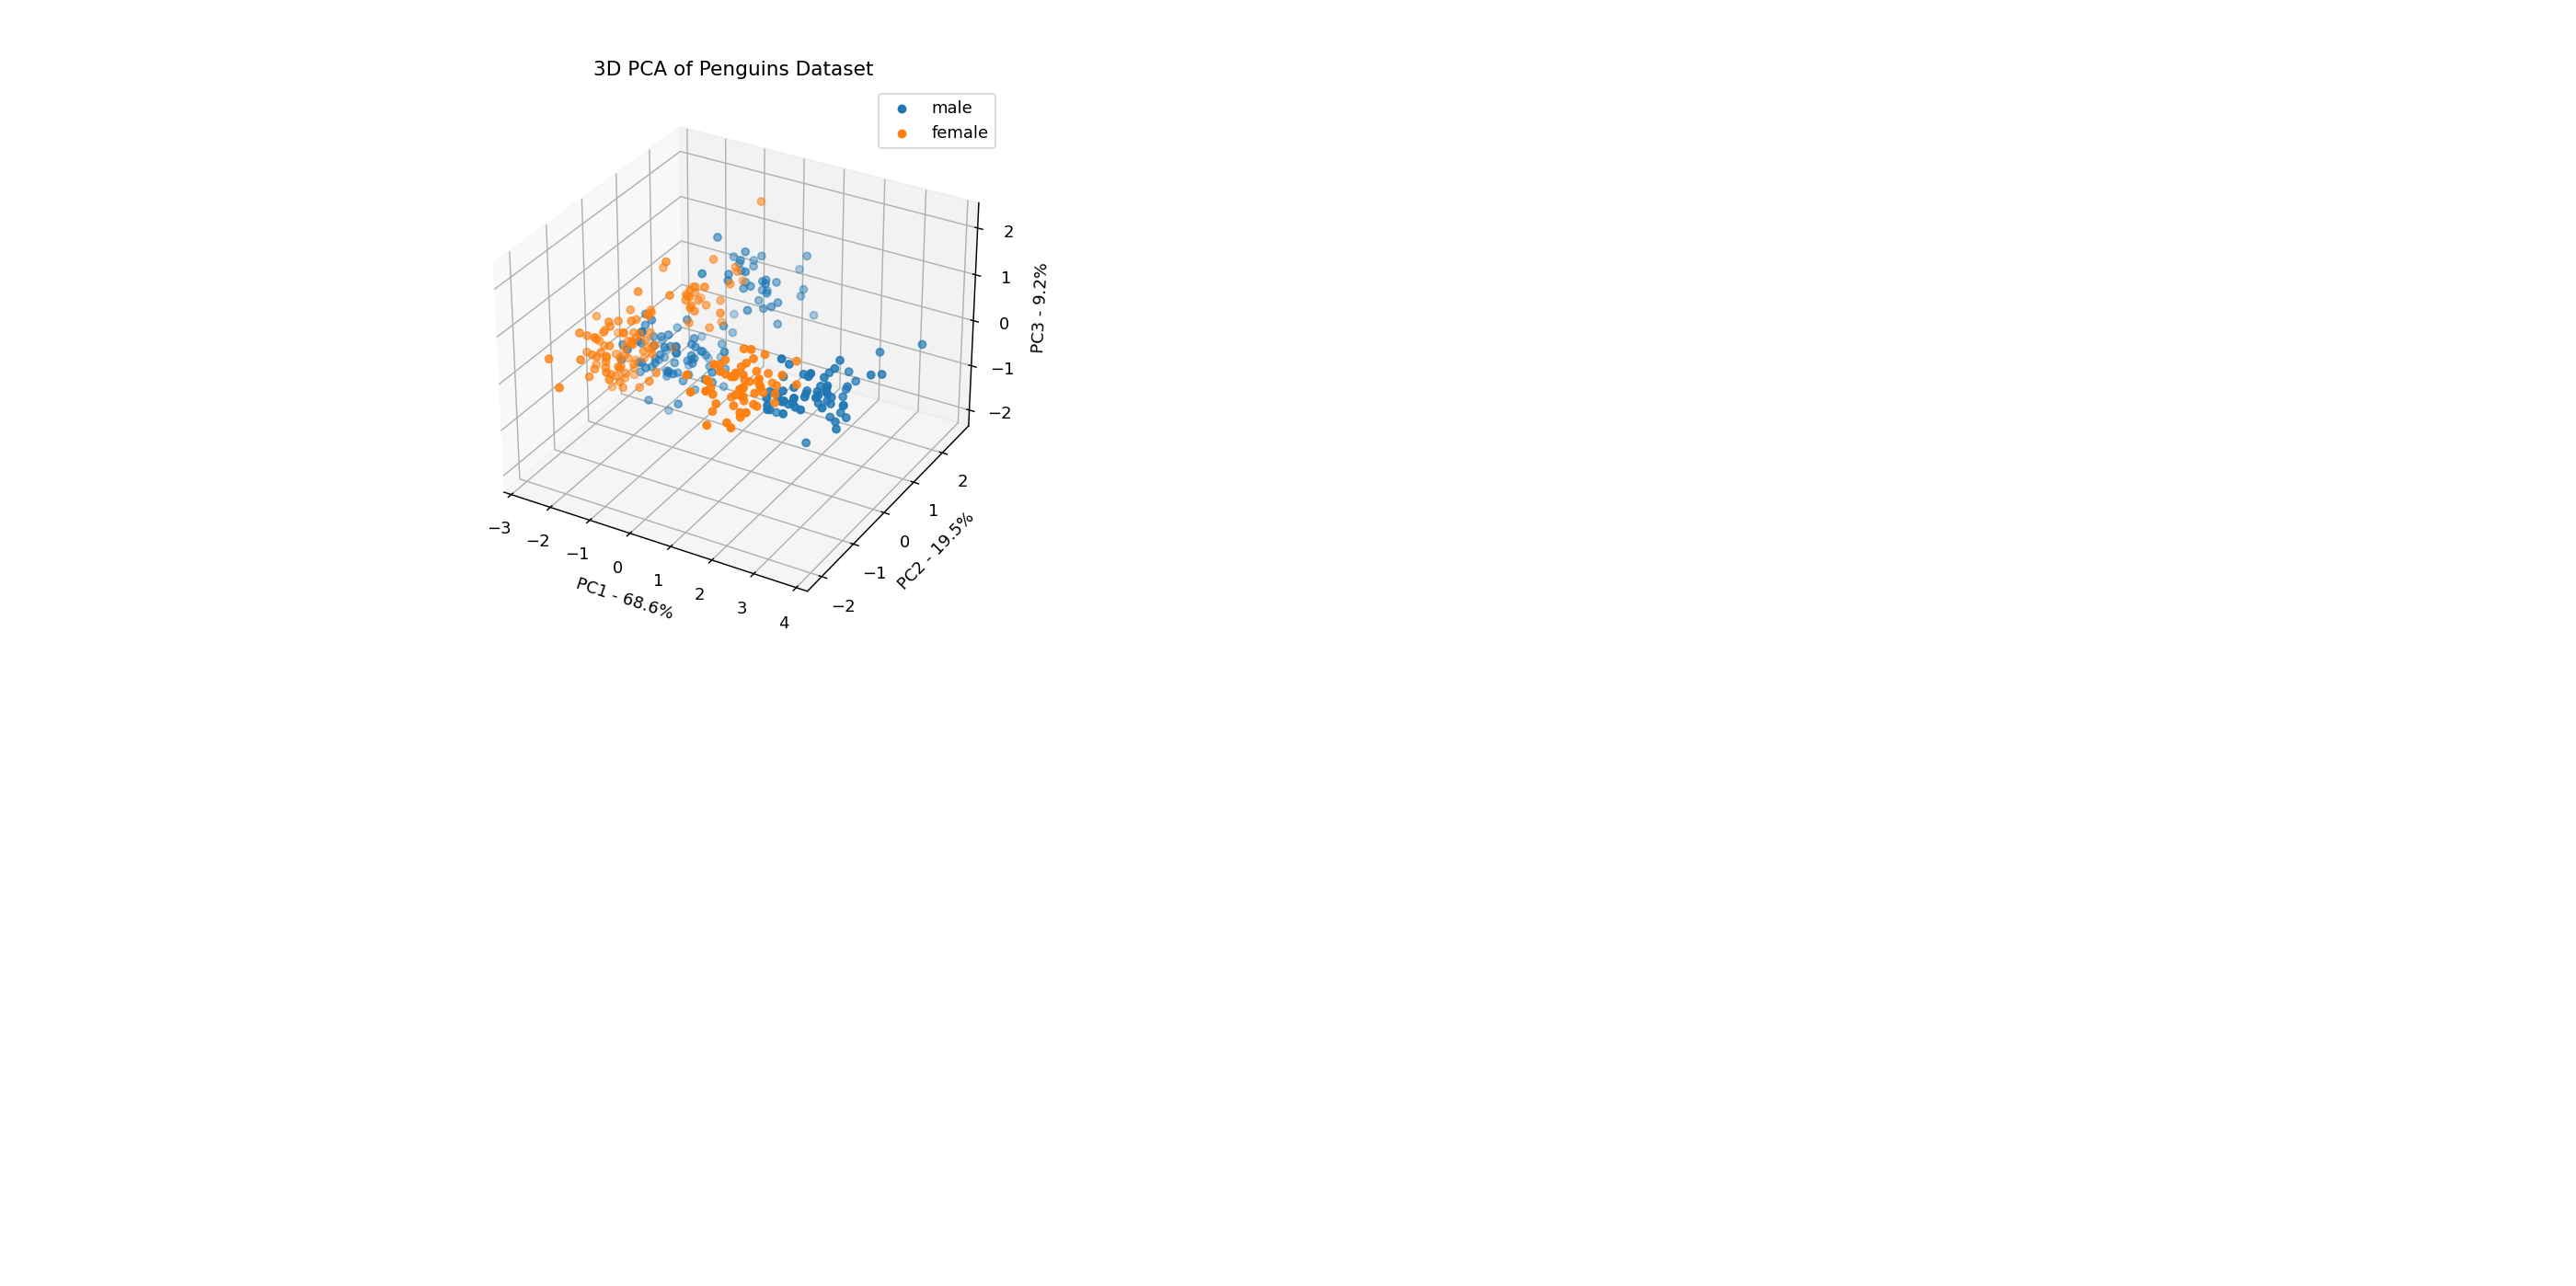

In [28]:
%matplotlib notebook
%matplotlib notebook 
import matplotlib.pyplot as plt
# 3D PCA plot
# RUN THIS CELL TO DISPLAY 3D PLOT
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
plt.title('3D PCA of Penguins Dataset')
ax.scatter(pca_df2.PC1[pca_df2.index=='male'], pca_df2.PC2[pca_df2.index=='male'], pca_df2.PC3[pca_df2.index=='male'],label='male')
ax.scatter(pca_df2.PC1[pca_df2.index=='female'], pca_df2.PC2[pca_df2.index=='female'], pca_df2.PC3[pca_df2.index=='female'],label='female')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))
plt.legend()


plt.show()

Looking at the 2D plot of the PCA it's still hard to distinguish samples by sex visually. However looking at 3D plot and rotating it it becomes much easier to separate samples. It's still not perfect and a lot of samples overlap however we are getting better result. We will try to apply different methods to get better separation results

As the next step we will try to cluster our data and see how KMeans algorithm will behave

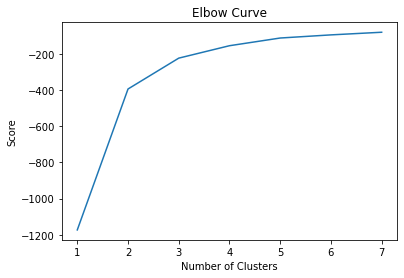

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# First we figure out what would be optimal number of cluster
# We know that we have 2 different classes and 2 clusters would be efficient
# But Elbow plot will help us see if we have some problems with distinguishing clusters

training_X = np.vstack((pca_df2["PC1"].tolist(), pca_df2["PC2"].tolist())).T
                       
scores=[]
k = 8
for i in range(1,k):
    kmeans = KMeans(n_clusters=int(i), random_state=0, max_iter=300)
    kmeans.fit(training_X)
    scores.append(kmeans.score(training_X))


plt.plot( range(1,k),scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In this case it's not quite clear how many clusters we should take. Since we know that there are two classes only KMeans might not behave good enough to separate them.

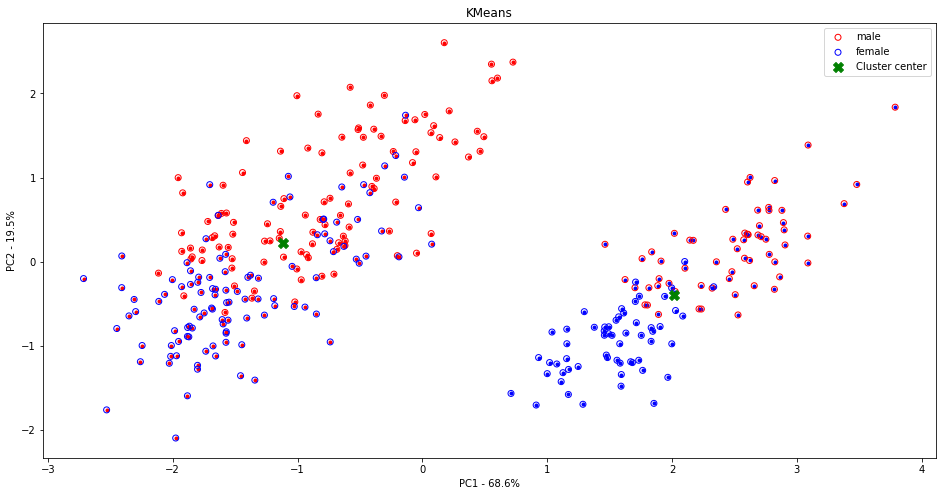

In [31]:
# kmeans training with 2 classes
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(training_X)

# plotting
plt.figure(figsize=(16,8))
for i in range(len(pca_df2["PC2"].tolist())):
    if kmeans.labels_[i]==0:
        plt.scatter(pca_df2["PC1"].tolist()[i], pca_df2["PC2"].tolist()[i], marker='.', color='blue')
    else:
        plt.scatter(pca_df2["PC1"].tolist()[i], pca_df2["PC2"].tolist()[i], marker='.', color='red')

# Plotting actual PCA data on top to see if we got any mismatches
plt.scatter(pca_df2.PC1[pca_df2.index=='male'], pca_df2.PC2[pca_df2.index=='male'],label='male', facecolors='none', edgecolors='red')
plt.scatter(pca_df2.PC1[pca_df2.index=='female'], pca_df2.PC2[pca_df2.index=='female'],label='female', facecolors='none', edgecolors='blue')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='X', c='green',label='Cluster center')

plt.legend()
plt.title("KMeans")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [33]:
total = 0
correct = 0
for i in range(len(kmeans.labels_)):
    total = total + 1
    if (kmeans.labels_[i] == 1 and pca_df2.index[i] == "male"):
        correct = correct + 1
    elif(kmeans.labels_[i] == 0 and pca_df2.index[i] == "female"):
        correct = correct + 1
    else:
        continue

print("Kmeans clustered",correct,"labels correctly out of",total)
print("Accuracy: ","{:.2f}".format(correct/total*100),'%')

Kmeans clustered 165 labels correctly out of 333
Accuracy:  49.55 %


KMeans algorithm didn't perform well in this case and it was obvious. A lot of samples were overlaping which gave us 49.55% accuracy by clustering using KMeans algorithm. Next we will try neural network to increase our prediction accuracy

Our approach to take 3 PCA components, scale it and fit it to neural network gave us 88.5% accuracy. Let's try to see if we can get results better than that

/Users/max/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


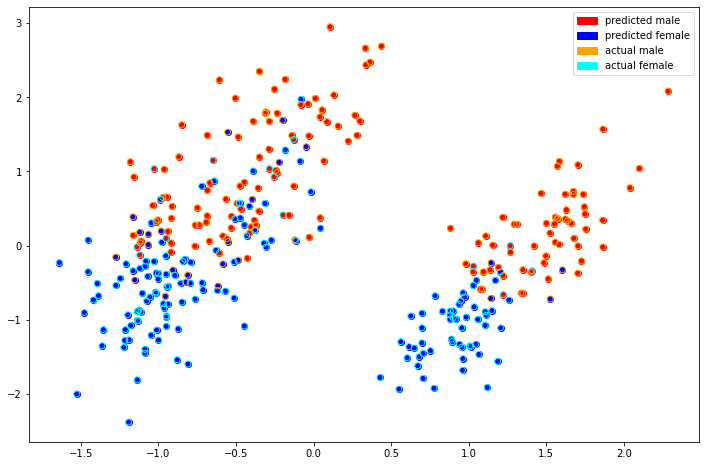

Accuracy of MLPClassifier(in percentage) : 88.58858858858859
Final Loss Value : 0.4067839671107257
Final Iterations : 500


In [36]:
scaler = StandardScaler()
# Take 3 PCA components and scale it
trainX = np.vstack((pca_df2['PC1'],pca_df2['PC2'],pca_df2['PC3'])).T
scaler.fit(trainX)
trainX = scaler.transform(trainX) 
trainY = pca_df2.index.tolist()

nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.0005, hidden_layer_sizes=(20, 20,10,10), max_iter =500, random_state=1)
nn.fit(trainX, trainY )

# Plot prediction based on 3 features on 2D plot
plt.figure(figsize=(12,8))
for i in range(len(training_X)):
    ans = nn.predict([[trainX[i,0],trainX[i,1],trainX[i,2]]])
    if ans=='male':
        plt.scatter(trainX[i,0], trainX[i,1], color='red')
    else:
        plt.scatter(trainX[i,0], trainX[i,1], color='blue')
        
red_patch = mpatches.Patch(color='red', label='predicted male')    
blue_patch = mpatches.Patch(color='blue', label='predicted female')

temp_df = pd.DataFrame(trainX, index=pca_df2.index)

plt.scatter(temp_df[0][temp_df.index=='male'], temp_df[1][temp_df.index=='male'],label='actual male', facecolors='none', edgecolors='orange')
plt.scatter(temp_df[0][temp_df.index=='female'], temp_df[1][temp_df.index=='female'],label='actual female', facecolors='none', edgecolors='cyan')

orange_patch = mpatches.Patch(color='orange', label='actual male')    
cyan_patch = mpatches.Patch(color='cyan', label='actual female')  


plt.legend(handles=[red_patch,blue_patch,orange_patch,cyan_patch])
plt.show()
        
#Comparing the predictions against the actual observations
yp = nn.predict(trainX)

#check how many of them are predicted well
count  = 0;
for i in range(len(trainX)):
    if yp[i] == trainY[i]:
        count +=1

accuracy = count/len(trainY)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

Let's try few experiments with different approaches

Experementations: n_neurons, learning_rate, epochs -> accuracy
1. PCA 3 components - (20,10), 0.001, 200 -> 89.49%
2. PCA 3 components - (10,10), 0.001, 200 -> 86.19%
3. PCA 3 components - (20,20), 0.0005, 500 -> 89.49%

<strong> 4. PCA 3 components - (20,20,10), 0.0005, 500 -> 90.09% </strong>

5. PCA 3 components - (20,20,10), 0.0005, 700 -> 90.09%
6. PCA 3 components - (20, 20,10,5), 0.0005, 700 -> 50.45%
7. PCA 3 components - (20, 20,10,10), 0.0005, 700 -> 88.59%
8. PCA 2 components - (20, 50), 0.001, 200 -> 81.38%
9. PCA 2 components - (20, 20, 10), 0.0005, 500 -> 82.88%
10. PCA 3 components - (20, 20,10), 0.00001, 700 -> 66.07%
11. Original data (4 features) - (20, 20,10), 0.0005, 700 -> 89.49%
12. Original data (bill_length_mm, flipper_length_mm) - (20, 20,10), 0.0005, 700 -> 60.96%

/Users/max/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


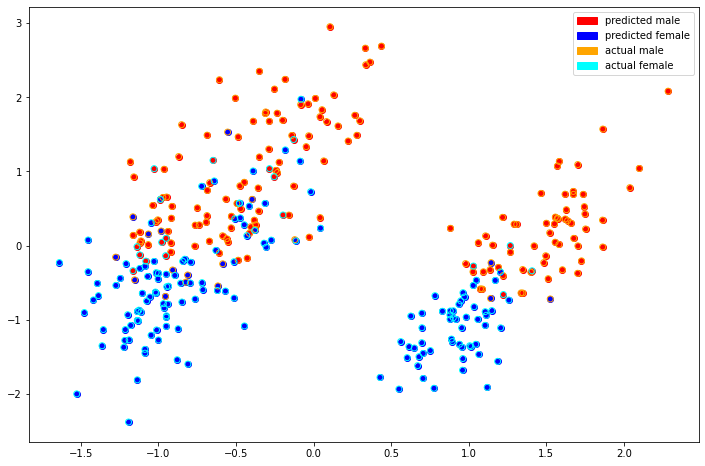

Accuracy of MLPClassifier(in percentage) : 90.09009009009009
Final Loss Value : 0.2769207984295664
Final Iterations : 500


In [37]:
scaler = StandardScaler()
# Take 3 PCA components and scale it
trainX = np.vstack((pca_df2['PC1'],pca_df2['PC2'],pca_df2['PC3'])).T
scaler.fit(trainX)
trainX = scaler.transform(trainX) 
trainY = pca_df2.index.tolist()

nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.0005, hidden_layer_sizes=(20, 20,10), max_iter =500, random_state=1)
nn.fit(trainX, trainY )

# Plot prediction based on 3 features on 2D plot
plt.figure(figsize=(12,8))
for i in range(len(training_X)):
    ans = nn.predict([[trainX[i,0],trainX[i,1],trainX[i,2]]])
    if ans=='male':
        plt.scatter(trainX[i,0], trainX[i,1], color='red')
    else:
        plt.scatter(trainX[i,0], trainX[i,1], color='blue')
        
red_patch = mpatches.Patch(color='red', label='predicted male')    
blue_patch = mpatches.Patch(color='blue', label='predicted female')

temp_df = pd.DataFrame(trainX, index=pca_df2.index)

plt.scatter(temp_df[0][temp_df.index=='male'], temp_df[1][temp_df.index=='male'],label='actual male', facecolors='none', edgecolors='orange')
plt.scatter(temp_df[0][temp_df.index=='female'], temp_df[1][temp_df.index=='female'],label='actual female', facecolors='none', edgecolors='cyan')

orange_patch = mpatches.Patch(color='orange', label='actual male')    
cyan_patch = mpatches.Patch(color='cyan', label='actual female')  


plt.legend(handles=[red_patch,blue_patch,orange_patch,cyan_patch])
plt.show()
        
#Comparing the predictions against the actual observations
yp = nn.predict(trainX)

#check how many of them are predicted well
count  = 0;
for i in range(len(trainX)):
    if yp[i] == trainY[i]:
        count +=1

accuracy = count/len(trainY)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

If we can find optimal hyper parameters as we did, we can get a good accuracy of predicting classes. Yet, it is not 100%, however the data is being complicated as well. Other algorithms didn't get even close to the results we got with neural network.

<strong>Final accuracy - 90.09%</strong>